In [17]:
import pandas as pd

In [19]:
df = pd.read_excel("Online Retail.xlsx")

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df.shape

(541909, 8)

In [22]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(406829, 8)

In [25]:
df = df[df['Country'] == 'United Kingdom']
df.shape

(361878, 8)

In [26]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [27]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [28]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [29]:
# RFM Hesaplama
import datetime as dt
analysis_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
analysis_date

Timestamp('2011-12-10 12:49:00')

In [30]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (analysis_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
})
#sum,mean,max,min
rfm.columns = ["Recency","Frequency","Monetary"]
#rfm

In [31]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1], duplicates='drop')
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,2,0.00,1,2,1,121
12747.0,2,11,4196.01,5,5,5,555
12748.0,1,224,29072.10,5,5,5,555
12749.0,4,8,3868.20,5,5,5,555
12820.0,3,4,942.34,5,3,4,534
...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121
18281.0,181,1,80.82,1,2,1,121
18282.0,8,3,176.60,5,3,1,531


In [32]:
from sklearn.cluster import KMeans



In [33]:
X = rfm[["Recency","Frequency","Monetary"]]
X

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12747.0,2,11,4196.01
12748.0,1,224,29072.10
12749.0,4,8,3868.20
12820.0,3,4,942.34
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
kmeans = KMeans(n_clusters=3,random_state=42) # elbow method kullan!
rfm["KMeansCluster"] = kmeans.fit_predict(X_scaled)

In [36]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,KMeansCluster
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,2,1,121,0
12747.0,2,11,4196.01,5,5,5,555,1
12748.0,1,224,29072.10,5,5,5,555,2
12749.0,4,8,3868.20,5,5,5,555,1
12820.0,3,4,942.34,5,3,4,534,1
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121,0
18281.0,181,1,80.82,1,2,1,121,0
18282.0,8,3,176.60,5,3,1,531,1


In [37]:
# Elbow method ile best n_cluster bulma
# Scatter plot oluşturma (kaç grup var? kaç eleamn var?)
wcss = [] 

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)  
    wcss.append(kmeans.inertia_) 


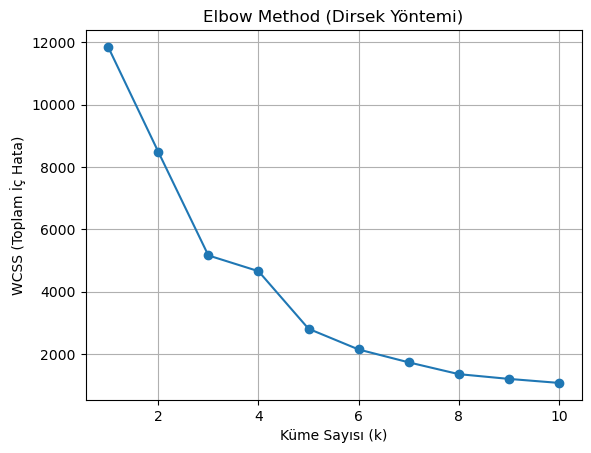

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (Dirsek Yöntemi)')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('WCSS (Toplam İç Hata)')
plt.grid()
plt.show()

In [39]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
rfm["KMeansCluster_3"] = kmeans_3.fit_predict(X_scaled)

kmeans_4 = KMeans(n_clusters=4, random_state=42)
rfm["KMeansCluster_4"] = kmeans_4.fit_predict(X_scaled)

print("k=3 için kümeler:")
print(rfm["KMeansCluster_3"].value_counts().sort_index())


print("k=4 için kümeler:")
print(rfm["KMeansCluster_4"].value_counts().sort_index())

k=3 için kümeler:
KMeansCluster_3
0    1009
1    2917
2      24
Name: count, dtype: int64
k=4 için kümeler:
KMeansCluster_4
0    1010
1    2919
2       3
3      18
Name: count, dtype: int64


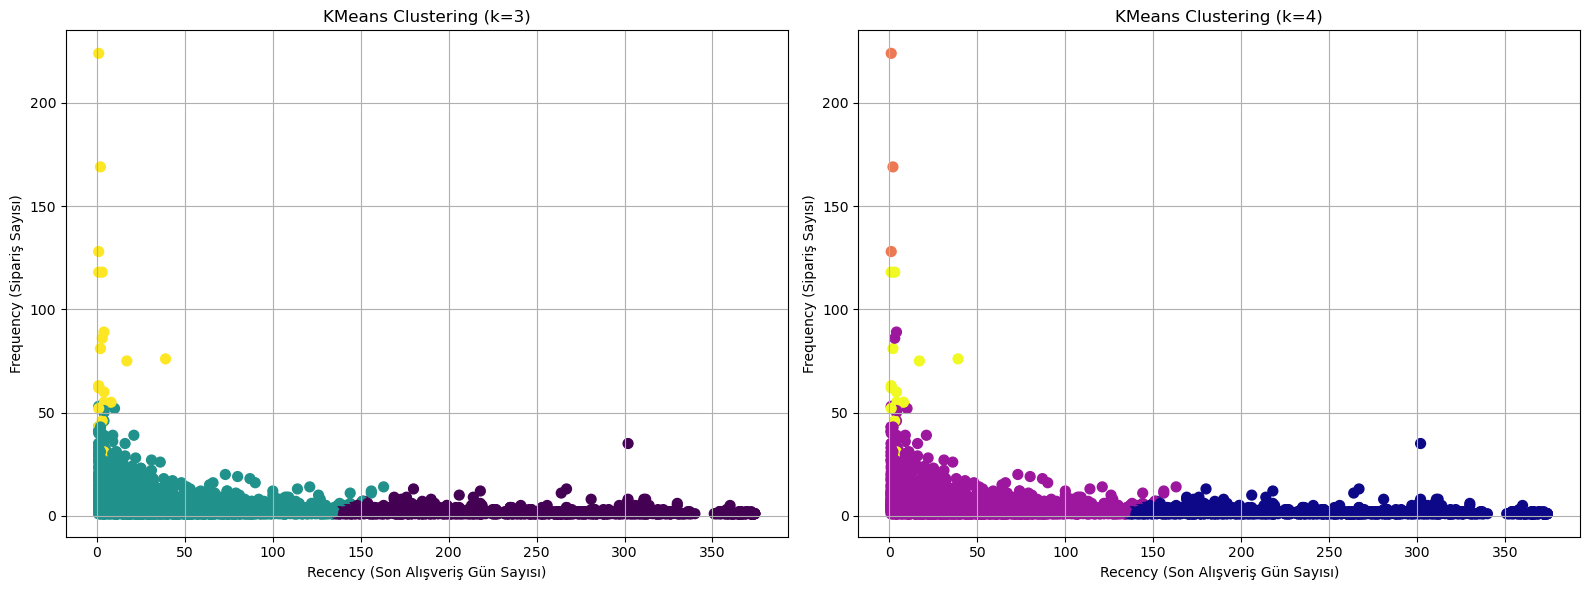

In [40]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(rfm["Recency"], rfm["Frequency"], c=rfm["KMeansCluster_3"], cmap="viridis", s=50)
axes[0].set_title("KMeans Clustering (k=3)")
axes[0].set_xlabel("Recency (Son Alışveriş Gün Sayısı)")
axes[0].set_ylabel("Frequency (Sipariş Sayısı)")
axes[0].grid(True)

axes[1].scatter(rfm["Recency"], rfm["Frequency"], c=rfm["KMeansCluster_4"], cmap="plasma", s=50)
axes[1].set_title("KMeans Clustering (k=4)")
axes[1].set_xlabel("Recency (Son Alışveriş Gün Sayısı)")
axes[1].set_ylabel("Frequency (Sipariş Sayısı)")
axes[1].grid(True)
plt.tight_layout()
plt.show()

In [41]:
cluster_summary = rfm.groupby("KMeansCluster_3").agg({
    "Recency": ["mean", "median"],
    "Frequency": ["mean", "median"],
    "Monetary": ["mean", "median"]
}).assign(Müşteri_Sayısı=lambda x: x.index.map(rfm["KMeansCluster_3"].value_counts())).sort_values(('Recency','mean'))

display(cluster_summary)


Recency         Frequency             Monetary             \
                       mean median       mean median          mean     median   
KMeansCluster_3                                                                 
2                  5.333333    3.0  75.291667   61.0  58652.933750  50927.525   
1                 39.804251   29.0   5.545766    4.0   1690.841064    867.110   
0                244.091179  239.0   1.856293    1.0    424.201785    287.020   

                Müşteri_Sayısı  
                                
KMeansCluster_3                 
2                           24  
1                         2917  
0                         1009

In [50]:
cluster_mapping = {
    0: "VIP Sadıklar",           # En değerli ve aktif müşteri grubu
    1: "Riskli Kayıp Müşteriler", # Aktif olmayan, düşük katkılı müşteri
    2: "Potansiyel VIP'ler"       # Daha sık alışveriş yaparsa VIP olabilir
}

rfm["Segment"] = rfm["KMeansCluster_3"].map(cluster_mapping)
segment_counts = rfm["Segment"].value_counts()

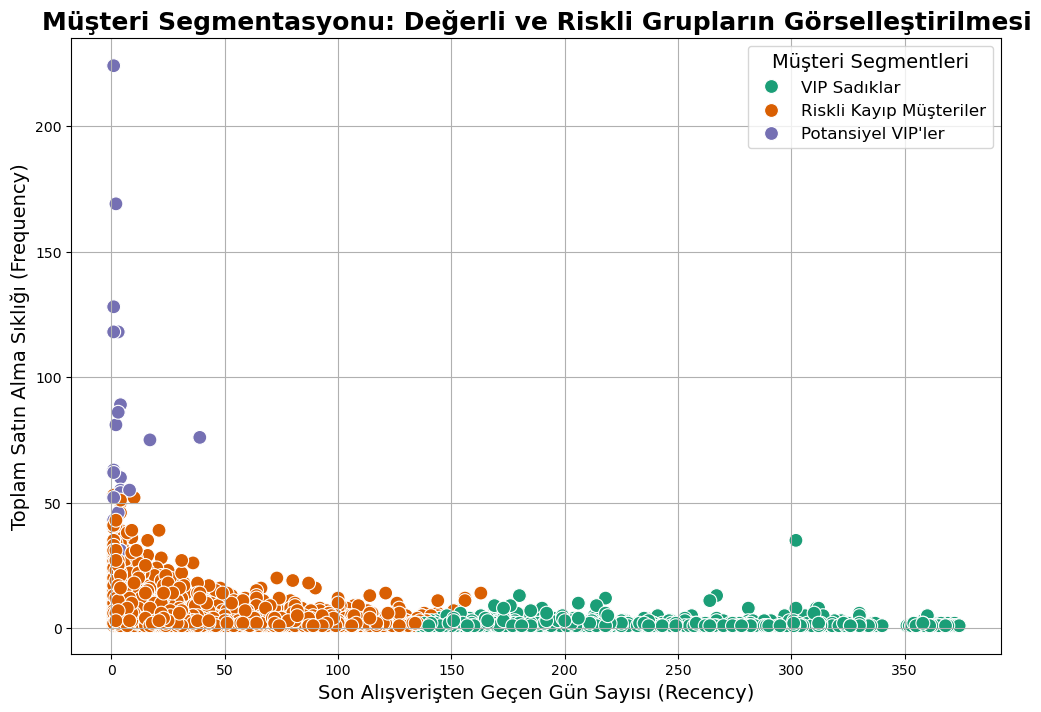

In [52]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x="Recency", y="Frequency", hue="Segment", palette="Dark2", s=100)
plt.title("Müşteri Segmentasyonu: Değerli ve Riskli Grupların Görselleştirilmesi", fontsize=18, weight='bold')
plt.xlabel("Son Alışverişten Geçen Gün Sayısı (Recency)", fontsize=14)
plt.ylabel("Toplam Satın Alma Sıklığı (Frequency)", fontsize=14)
plt.legend(title="Müşteri Segmentleri", fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()


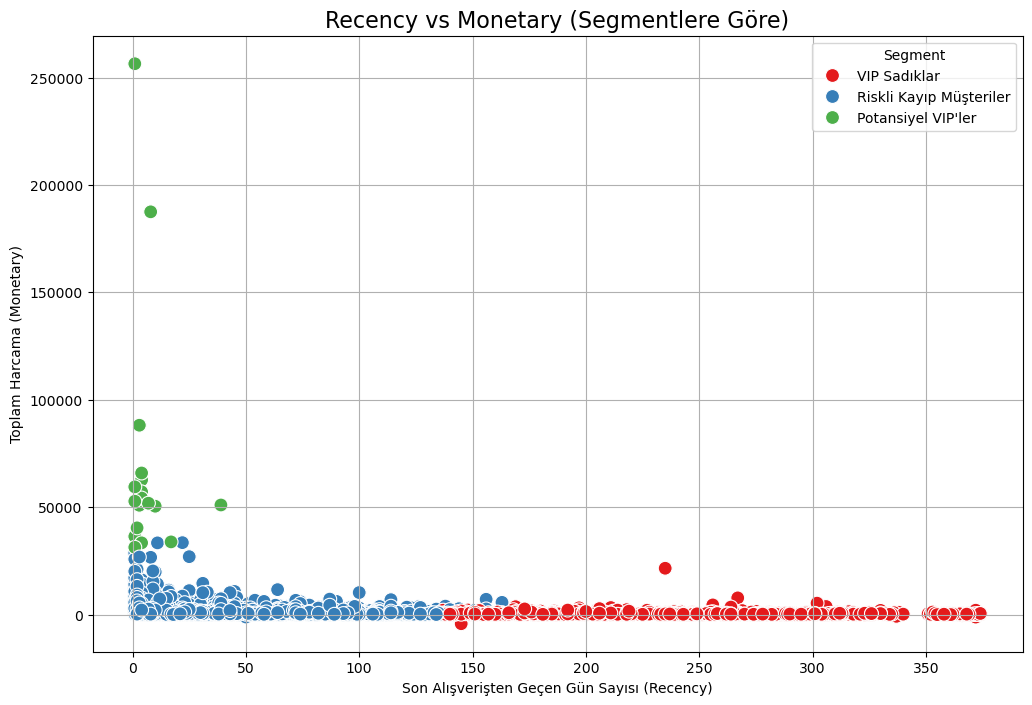

In [54]:
#Müşterilerin hem ne kadar yakın zamanda alışveriş yaptığı hem de ne kadar harcama yaptığı arasındaki ilişki
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Segment", palette="Set1", s=100)
plt.title("Recency vs Monetary (Segmentlere Göre)", fontsize=16)
plt.xlabel("Son Alışverişten Geçen Gün Sayısı (Recency)")
plt.ylabel("Toplam Harcama (Monetary)")
plt.legend(title="Segment")
plt.grid(True)
plt.show()


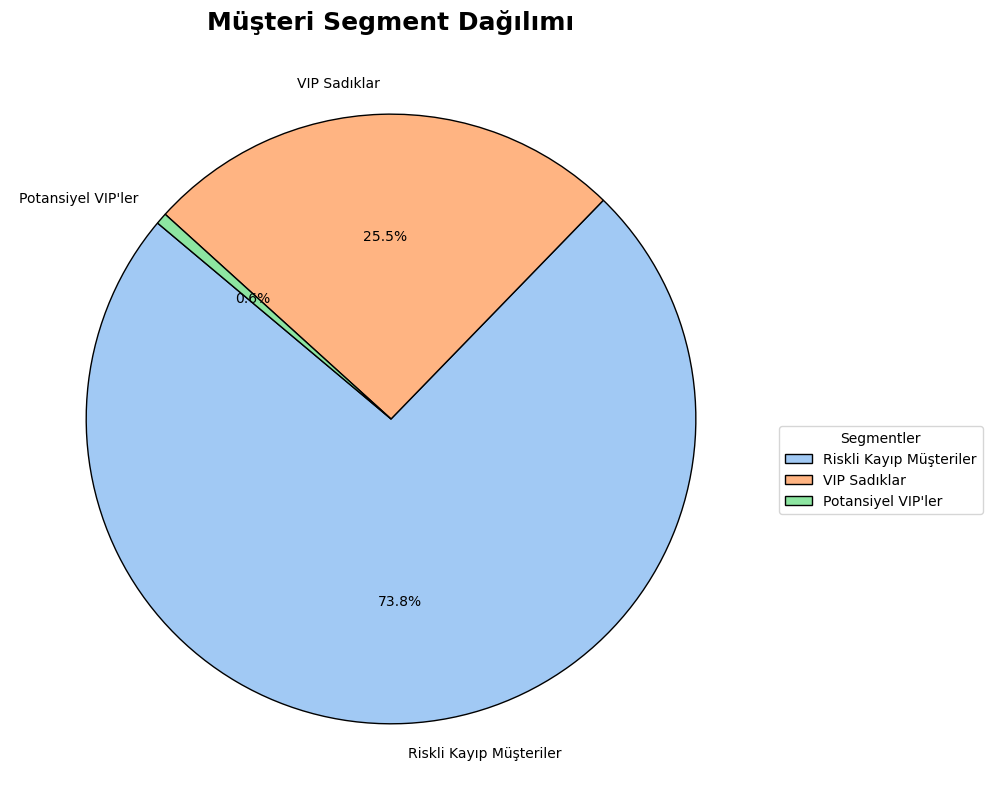

/var/folders/m8/s3rdp9n15r9bb8y_d_z_52540000gn/T/ipykernel_77056/2875129313.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x="Segment", order=segment_counts.index, palette="Set2", edgecolor="black")


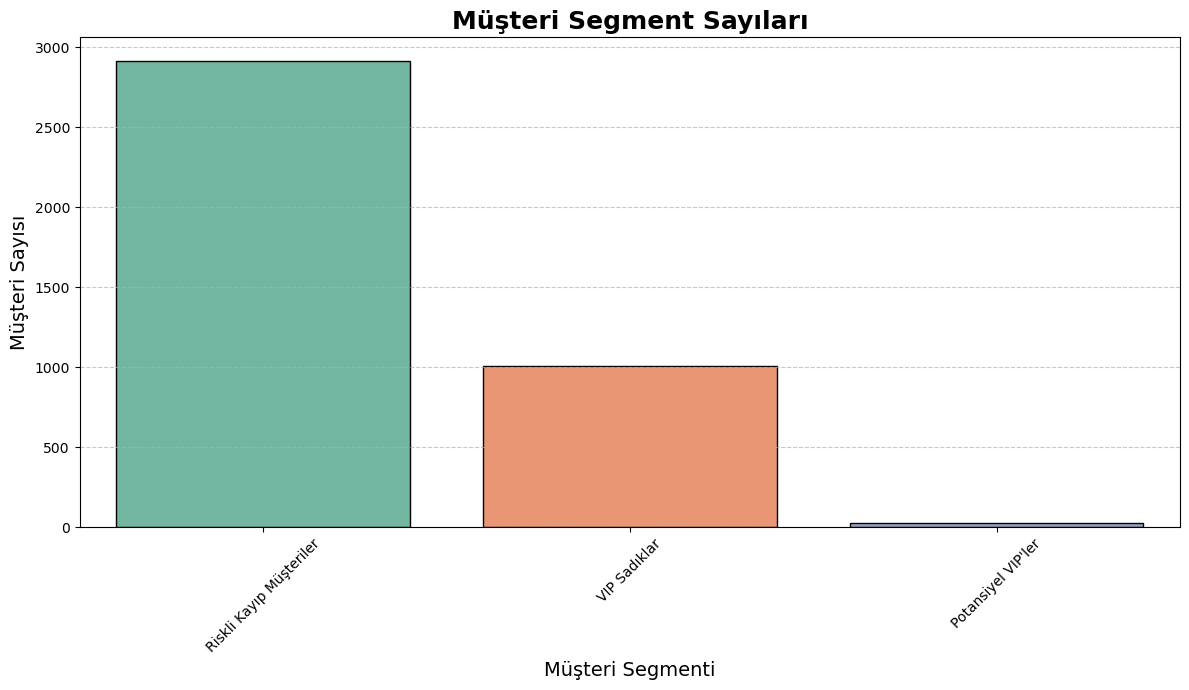

In [56]:
# Pasta Grafik
colors = sns.color_palette('pastel')[0:len(segment_counts)]

plt.figure(figsize=(10,10))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={"edgecolor":"black", 'linewidth': 1})
plt.title("Müşteri Segment Dağılımı", fontsize=18, weight="bold")
plt.legend(segment_counts.index, title="Segmentler", loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(data=rfm, x="Segment", order=segment_counts.index, palette="Set2", edgecolor="black")
plt.title("Müşteri Segment Sayıları", fontsize=18, weight="bold")
plt.xlabel("Müşteri Segmenti", fontsize=14)
plt.ylabel("Müşteri Sayısı", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



In [58]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(X_scaled, kmeans_3.labels_)
db_score = davies_bouldin_score(X_scaled, kmeans_3.labels_)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies Bouldin Score: {db_score}")


Silhouette Score: 0.5774240414172696
Davies Bouldin Score: 0.6626114890183786


In [60]:
import joblib
import os

# Model kaydetme fonksiyonu
def save_model(scaler, model, scaler_path="scaler.pkl", model_path="kmeans_model.pkl"):
    try:
        joblib.dump(scaler, scaler_path)
        print(f"Scaler başarıyla '{scaler_path}' olarak kaydedildi.")
        joblib.dump(model, model_path)
        print(f"KMeans Model başarıyla '{model_path}' olarak kaydedildi.")
        
        # Dosyaların kaydedildiğini doğrula
        if os.path.exists(scaler_path) and os.path.exists(model_path):
            print("Dosyalar başarıyla oluşturuldu.")
        else:
            print("Dosyalar bulunamadı, kaydetme başarısız.")
    except Exception as e:
        print(f"Hata oluştu: {e}")

# Fonksiyonu çağır
save_model(scaler, kmeans_3)

# Çalışma dizinini ve dosyaları kontrol et
print("Çalışma dizini:", os.getcwd())
print("Dizindeki dosyalar:", os.listdir())

Scaler başarıyla 'scaler.pkl' olarak kaydedildi.
KMeans Model başarıyla 'kmeans_model.pkl' olarak kaydedildi.
Dosyalar başarıyla oluşturuldu.
Çalışma dizini: /Users/sultan/Desktop/Projeler/rfm
Dizindeki dosyalar: ['scaler.pkl', 'rfm (1).ipynb', 'Online Retail.xlsx', 'kmeans_model.pkl', 'rfm.ipynb', '.ipynb_checkpoints']
